In [2]:
#interactive plot (like hvplot)
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt   #makes matplotlib work like MATLAB
import matplotlib.animation as animation   #animates by calling a function over and over

from openbb_terminal.sdk import openbb

In [3]:
# imports for the API key retrevial
import requests
from dotenv import load_dotenv
import os 

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# Use the os.getenv function to retrieve the environment variable named FRED_API_KEY
# Store as a Python variable named api_key
api_key = os.getenv("FRED_API_KEY")
type(api_key)

str

In [5]:
# test that key works 
# openbb.keys.fred(
#     key = api_key,
#     persist=True

# )

In [6]:
# Pull bond data --> note the default returns just the 10yr
data_look = openbb.economy.treasury(
    instruments=["nominal"],
    start_date="1985-01-01"
)
data_look.head()

,Nominal_10-year
TIME_PERIOD,
1985-01-01,11.38
1985-02-01,11.51
1985-03-01,11.86
1985-04-01,11.43
1985-05-01,10.85


In [7]:
# Define the maturities that want to pull
maturities = ['3m', '6m', '1y', '2y', '3y', '5y', '7y', '10y', '30y']

#Now pull all maturities of interst --> using maturities parm as list maturities
data = openbb.economy.treasury(
    instruments=["nominal"],
    maturities=maturities,
    start_date="1985-01-01"
)

data.head()

,Nominal_3-month,Nominal_6-month,Nominal_1-year,Nominal_2-year,Nominal_3-year,Nominal_5-year,Nominal_7-year,Nominal_10-year,Nominal_30-year
TIME_PERIOD,,,,,,,,,
1985-01-01,8.02,8.45,9.02,9.93,10.43,10.93,11.27,11.38,11.45
1985-02-01,8.56,8.87,9.29,10.17,10.55,11.13,11.44,11.51,11.47
1985-03-01,8.83,9.45,9.86,10.71,11.05,11.52,11.82,11.86,11.81
1985-04-01,8.22,8.71,9.14,10.09,10.49,11.01,11.34,11.43,11.47
1985-05-01,7.73,8.07,8.46,9.39,9.75,10.34,10.72,10.85,11.05


In [8]:
# Rename columns so easier to work with  ---> use already defined maturities list
data.columns = maturities
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y
TIME_PERIOD,,,,,,,,,
1985-01-01,8.02,8.45,9.02,9.93,10.43,10.93,11.27,11.38,11.45
1985-02-01,8.56,8.87,9.29,10.17,10.55,11.13,11.44,11.51,11.47
1985-03-01,8.83,9.45,9.86,10.71,11.05,11.52,11.82,11.86,11.81
1985-04-01,8.22,8.71,9.14,10.09,10.49,11.01,11.34,11.43,11.47
1985-05-01,7.73,8.07,8.46,9.39,9.75,10.34,10.72,10.85,11.05


In [9]:
# set yld curve as inverted if longer tem rates are LESS than shorter term
# here you can use any 2 maturities for comparison, here we'll use 3mo and 30yr

data["inverted"] = data["3m"] > data["30y"]  #--> this adds a bool col called inverted
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y,inverted
TIME_PERIOD,,,,,,,,,,
1985-01-01,8.02,8.45,9.02,9.93,10.43,10.93,11.27,11.38,11.45,False
1985-02-01,8.56,8.87,9.29,10.17,10.55,11.13,11.44,11.51,11.47,False
1985-03-01,8.83,9.45,9.86,10.71,11.05,11.52,11.82,11.86,11.81,False
1985-04-01,8.22,8.71,9.14,10.09,10.49,11.01,11.34,11.43,11.47,False
1985-05-01,7.73,8.07,8.46,9.39,9.75,10.34,10.72,10.85,11.05,False


In [ ]:
# inital function def
def init_func():
    line.set_data([], [])
    plt.title("U.S. Treasury Bond Yield Curve")
    return line

In [ ]:
#!jupyter labextension list

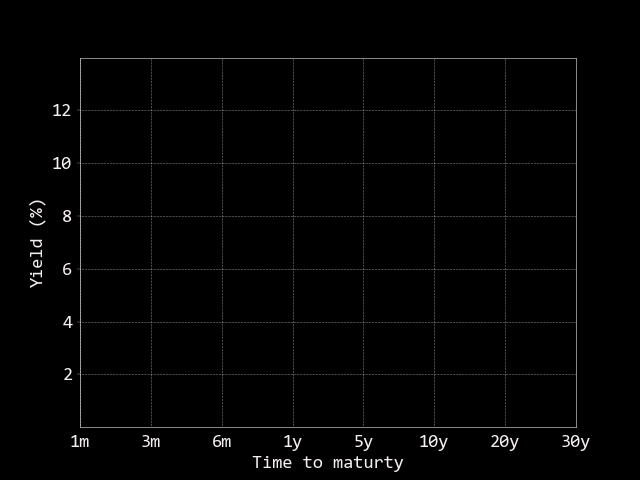

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([], [])

# Set the range of ticks
ax.set_xlim(0, 7)
ax.set_ylim(0, 14)

# Set the tick locations
ax.set_xticks(range(8))
ax.set_yticks([2, 4, 6, 8, 10, 12])

# Set the axis labels
ax.set_xticklabels(["1m","3m","6m","1y","5y","10y","20y","30y"])
ax.set_yticklabels([2, 4, 6, 8, 10, 12])

# Foce the y-axis labels to the left
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

# Add the axis lables
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturty")

# add in click fiunction to start & stop animation
def run_animation():
    anim_running = True

    def onClick(event):
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True

    def animFunc(i):
        x = range(0, len(maturities))
        y = data[maturities].iloc[i]
        dt_ = data.index[i].strftime("%Y-%m-%d")
    
        if data.inverted.iloc[i]:
            line.set_color("r")
        else:
            line.set_color("y")
    
        line.set_data(x, y)
    
        plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
        return line,
        # Animation update function here

    fig.canvas.mpl_connect('button_press_event', onClick)

    anim = animation.FuncAnimation(
    fig, 
    animFunc,
    init_func=init_func,
    frames=len(data.index),
    interval=5,
    blit=True)

run_animation()


In [ ]:
# Old code from PQN#30

# setup plot using matplotlib
# this code is template and added in specific values for this ex

# Initialize figure
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot([], [])

# # Set the range of ticks
# ax.set_xlim(0, 7)
# ax.set_ylim(0, 20)

# # Set the tick locations
# ax.set_xticks(range(8))
# ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

# # Set the axis labels
# ax.set_xticklabels(["1m","3m","6m","1y","5y","10y","20y","30y"])
# ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

# # Foce the y-axis labels to the left
# ax.yaxis.set_label_position("left")
# ax.yaxis.tick_left()

# # Add the axis lables
# plt.ylabel("Yield (%)")
# plt.xlabel("Time to maturty")
#-----------------------------------------------
# def init_func():
#     line.set_data([], [])
#     plt.title("U.S. Treasury Bond Yield Curve")
#     return line

# def animate(i):
#     x = range(0, len(maturities))
#     y = data[maturities].iloc[i]
#     dt_ = data.index[i].strftime("%Y-%m-%d")
    
#     if data.inverted.iloc[i]:
#         line.set_color("r")
#     else:
#         line.set_color("y")
    
#     line.set_data(x, y)
    
#     plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
#     return line,

# ani = animation.FuncAnimation(
#     fig, 
#     animate,
#     init_func=init_func,
#     frames=len(data.index),
#     interval=5,
#     blit=True
# )